---

# <center>★ AI / ML Project - Face Recognition ★

---

<center> <img src="result.png" style="width: 600px;"/> <center/>

---

### Description:

A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces, typically employed to authenticate users through ID verification services, works by pinpointing and measuring facial features from a given image.

Development began on similar systems in the 1960s, beginning as a form of computer application. Since their inception, facial recognition systems have seen wider uses in recent times on smartphones and in other forms of technology, such as robotics. Because computerized facial recognition involves the measurement of a human's physiological characteristics, facial recognition systems are categorized as biometrics. Although the accuracy of facial recognition systems as a biometric technology is lower than iris recognition and fingerprint recognition, it is widely adopted due to its contactless process. Facial recognition systems have been deployed in advanced human–computer interaction, video surveillance and automatic indexing of images.


### Acknowledgement: 
The dataset is referred from Kaggle:
https://github.com/opencv/opencv/blob/4.x/data/haarcascades/haarcascade_frontalface_default.xml

### Objective:
- To accurately perform face recognition using claissical Computer Vision + Deep Learning technique.

---

# <center> <u> <i> Code Implementation:

### 1. Importing the basic libraries

In [171]:
# Importing the basic libraries

import cv2
import math
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

### 2. Reading the Image

In [103]:
# Defining the path for train and test images

Train_dir = pathlib.Path('images/train')
Test_dir = pathlib.Path('images/test')
Val_dir = pathlib.Path('images/val')

image_count_train = len(list(Train_dir.glob('*/*.png')))
print("Training Samples ---> ",image_count_train)

image_count_test = len(list(Test_dir.glob('*/*.png')))
print("Testing Samples ---> ",image_count_test)

image_count_val = len(list(Val_dir.glob('*/*.png')))
print("Testing Samples ---> ",image_count_val)

Training Samples --->  274
Testing Samples --->  60
Testing Samples --->  60


In [104]:
#Defining constants

random_seed=123
batch_size = 32
img_height = 180
img_width = 180

In [108]:
# Training Set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(Train_dir,
                                                               seed=random_seed,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

# Testing Set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(Test_dir,
                                                               seed=random_seed,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

# Validation Set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(Val_dir,
                                                               seed=random_seed,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 274 files belonging to 5 classes.
Found 60 files belonging to 5 classes.
Found 60 files belonging to 5 classes.


In [5]:
# Listing all the classes

class_names = train_ds.class_names
class_map={}
name_class_map={"chris_evans":"Chris_Evans", "chris_hemsworth":"Chris_Hemsworth", "mark_ruffalo":"Mark_Ruffalo", 
"robert_downey_jr":"Robert_Downey_Jr", "scarlett_johansson":"Scarlett_Johansson"}

for i in range(len(class_names)):
    class_map[i]=class_names[i]
class_map

{0: 'chris_evans',
 1: 'chris_hemsworth',
 2: 'mark_ruffalo',
 3: 'robert_downey_jr',
 4: 'scarlett_johansson'}

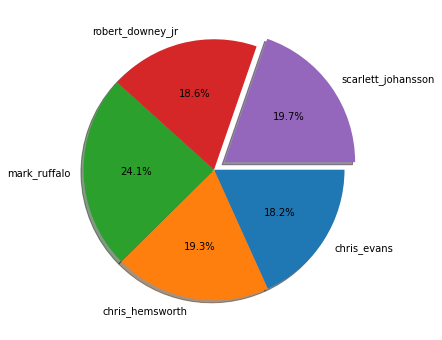

In [6]:
#Visualizing Data Classes Distribution

class_count = []
for i in range(len(class_names)):
    class_count.append(len(list(Train_dir.glob('{}/*.png'.format(class_names[i])))))

    
plt.pie(class_count, shadow=True, startangle=0, explode=[0,0,0,0,0.1], autopct='%1.1f%%', counterclock=False, labels=train_ds.class_names)
#, labels=class_map.values())
plt.show()

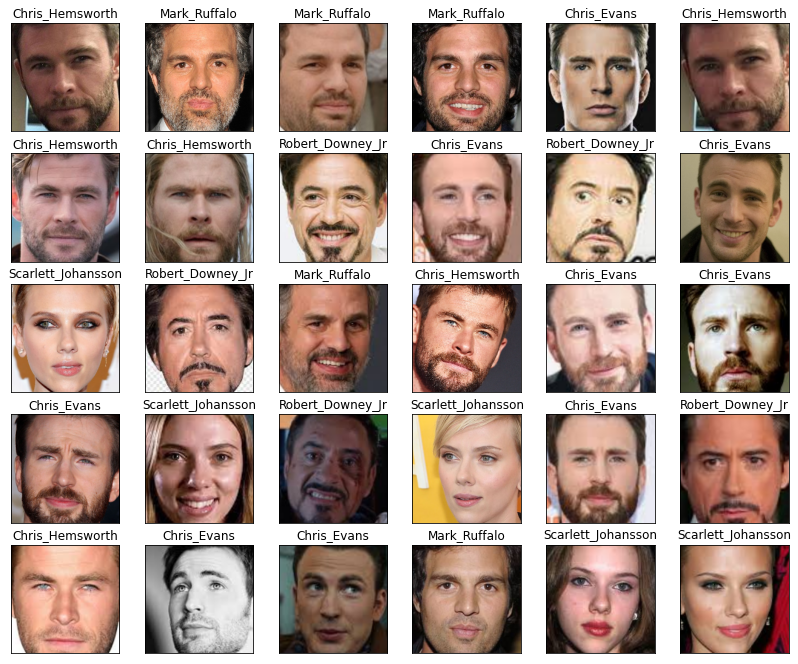

In [7]:
#Visualising a batch of image dataset

plt.figure(figsize=[14,14])
for image, label in train_ds.take(1):
    for e,i in enumerate(image):
        if e<30:
            plt.subplot(6,6,e+1)
            plt.imshow(i.numpy().astype('uint8'))
            plt.title(name_class_map[class_map[label[e].numpy()]])
            plt.xticks([])
            plt.yticks([])
plt.show()

In [85]:
# Staging the Dataset

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# Develop a sequential model using tensorflow keras

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
# Training the model

chkpt = ModelCheckpoint('checkpoints/best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

epochs=25
history_1 = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[es, chkpt])

Epoch 1/25
9/9 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 0.9818
Epoch 00001: val_loss improved from inf to 0.19577, saving model to checkpoints\best_model.h5
9/9 [==============================] - 3s 286ms/step - loss: 0.1062 - accuracy: 0.9818 - val_loss: 0.1958 - val_accuracy: 0.9333
Epoch 2/25
9/9 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9818
Epoch 00002: val_loss improved from 0.19577 to 0.11281, saving model to checkpoints\best_model.h5
9/9 [==============================] - 3s 296ms/step - loss: 0.0528 - accuracy: 0.9818 - val_loss: 0.1128 - val_accuracy: 0.9500
Epoch 3/25
9/9 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9964
Epoch 00003: val_loss improved from 0.11281 to 0.04091, saving model to checkpoints\best_model.h5
9/9 [==============================] - 3s 290ms/step - loss: 0.0336 - accuracy: 0.9964 - val_loss: 0.0409 - val_accuracy: 0.9833
Epoch 4/25
9/9 [==============================]

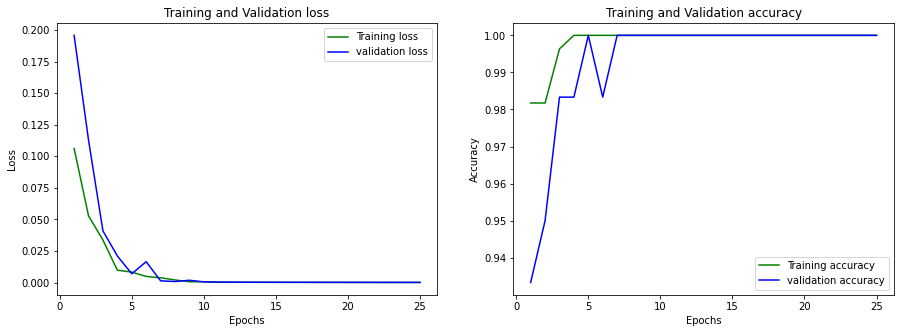

In [59]:
#Visualising model performance

acc_train = history_1.history['accuracy']
acc_val = history_1.history['val_accuracy']

loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']

epochs = range(1,26)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
# Loading the saved model

saved_model = tf.keras.models.load_model('checkpoints/best_model.h5')
saved_model

## 4. Inferencing

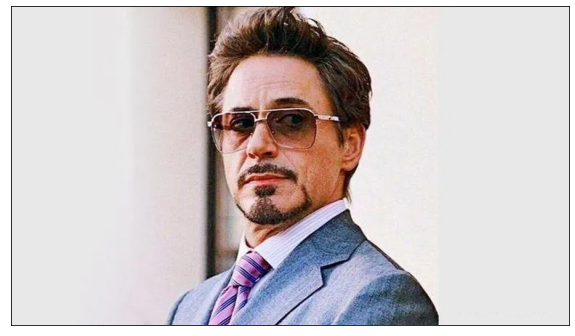

In [219]:
# Readinf the image file
img = cv2.imread('robert.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting the image
def plot_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    
plot_image(img)
plt.show()

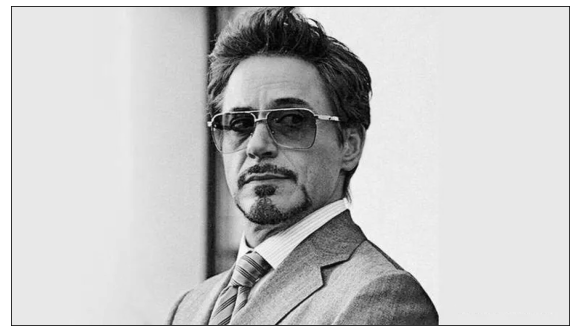

In [220]:
# Converting the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plot_image(gray, cmap='gray')
plt.show()

In [221]:
# Implementing Cascade Classifier

face_cascade = cv2.CascadeClassifier('face.xml')

faces_rect = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)

print(f'Number of face ===> {len(faces_rect)}')

Number of face ===> 1


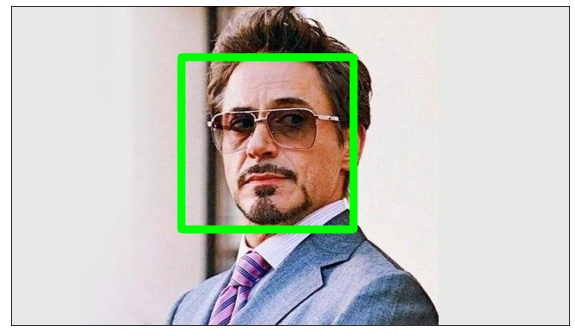

In [222]:
# Plotting the area of face detection

for (x,y,w,h) in faces_rect:
    cropped = img[y:y+h, x:x+w].copy()
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=10)
    
plot_image(img)

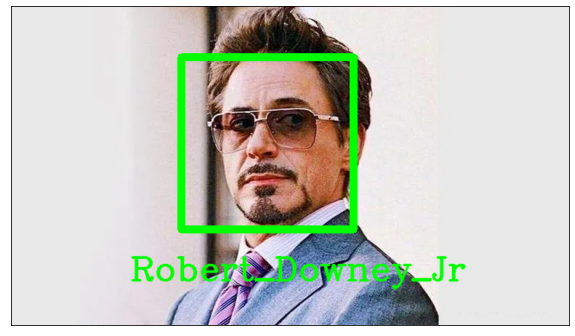

In [241]:
# Prediction

img_2 = img.copy()
cropped = cv2.resize(cropped, (img_height, img_width))
final_img = np.expand_dims(cropped, axis=0)
                           
prediction = saved_model.predict(final_img)
predicted_value = np.argmax(prediction)
predicted_label = name_class_map[class_map[predicted_value]]

cv2.putText(img_2, predicted_label, (x-70,y+h+70), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,255,0), 2, cv2.LINE_AA)
    
plot_image(img_2)

## 5. Batch Prediction

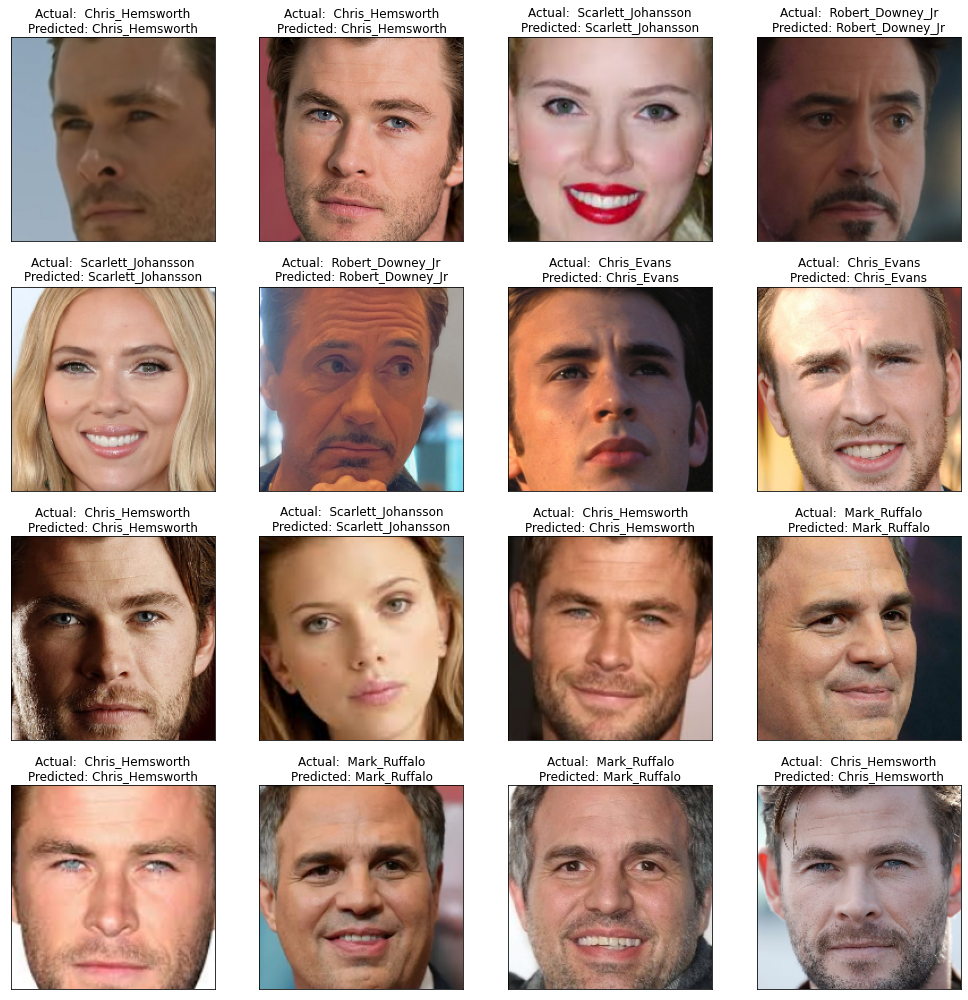

In [242]:
#Visualising a batch of image dataset

test_batch = [(x, y) for (x,y) in val_ds.take(1)] # loading 1 batch of data
image, label = test_batch[0][0], test_batch[0][1]

prediction = saved_model.predict(image)
prediction = np.argmax(prediction, axis=1)


plt.figure(figsize=[14,14])
for e in range(16):
    plt.subplot(4,4,e+1)
    plt.imshow(image[e].numpy().astype('uint8'))
    actual_label = name_class_map[class_map[label[e].numpy()]]
    prediction = saved_model.predict(np.expand_dims(image[e], axis=0))
    predicted_label = name_class_map[class_map[np.argmax(prediction)]]
    #predicted_label = np.argmax(saved_model.predict(image))
    plt.title('Actual:  {}\nPredicted: {}'.format(actual_label, predicted_label))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

---

# <center> <u> <i>Project Outcomes & Conclusion:

### Here are some of the key outcomes of the project:
- The face detection technique used in the project does a good job in identifying single potraits.
- However it struggles to in the presence of multiple faces & objects in an image.
- Possibly it could be due to the fact that it's quiet primitive & old method.
- More recent advancements, specifically in Deep Learning + CV, are expected to perform better than the traditional approach implemented in this project.
- Stay tuned for advanced DL + CV projects coming soon...

In [ ]:
#<<<--------------------------------------THE END---------------------------------------->>>